## 3 digits - Merging only year wise

### Waves 4,5,6

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/data_clean_w456.csv"
)
indexes = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/work_quality_indexes_year.csv"
)

In [3]:
def convert_to_3_digits(number):
    return int(str(number)[:-1]) if number >= 1000 else number


df["isco"] = df["isco"].apply(lambda x: convert_to_3_digits(x))
indexes["isco"] = indexes["isco"].apply(lambda x: convert_to_3_digits(x))

In [4]:
df = df.merge(indexes, on=["year", "isco"], how="inner")

In [5]:
df

,mergeid,wave,year,age,nb_children,nb_grandchildren,partnerinhh,job_status,industry,thinc,...,jqi_working_time_quality,jqi_monthly_earnings_weighted,jqi_skills_discretion_weighted,jqi_social_environment_weighted,jqi_physical_environment_weighted,jqi_intensity_weighted,jqi_prospects_weighted,jqi_working_time_quality_weighted,jqi_sum,jqi_sum_weighted
0,AT-009262-01,4,2011,56.0,1.0,2.0,1,Self-employed,Wholesale and retail trade,29620.0,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,429.722920,219.308017
1,AT-009262-01,4,2011,56.0,1.0,2.0,1,Self-employed,Wholesale and retail trade,29620.0,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,429.722920,219.308017
2,AT-009262-01,4,2011,56.0,1.0,2.0,1,Self-employed,Wholesale and retail trade,29620.0,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,429.722920,219.308017
3,AT-009262-01,4,2011,56.0,1.0,2.0,1,Self-employed,Wholesale and retail trade,29620.0,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,429.722920,219.308017
4,AT-009262-01,4,2011,56.0,1.0,2.0,1,Self-employed,Wholesale and retail trade,29620.0,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,429.722920,219.308017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213860,EE-410037-01,6,2015,62.0,2.0,2.0,1,Public sector employee,Education,0.0,...,68.262500,2255.713254,68.702156,63.395814,79.248063,32.921086,61.382785,57.863807,438.708476,329.799791
213861,EE-410037-01,6,2015,62.0,2.0,2.0,1,Public sector employee,Education,0.0,...,68.262500,2255.713254,68.702156,63.395814,79.248063,32.921086,61.382785,57.863807,438.708476,329.799791
213862,EE-410037-01,6,2015,62.0,2.0,2.0,1,Public sector employee,Education,0.0,...,68.262500,2255.713254,68.702156,63.395814,79.248063,32.921086,61.382785,57.863807,438.708476,329.799791
213863,EE-410037-01,6,2015,62.0,2.0,2.0,1,Public sector employee,Education,0.0,...,68.262500,2255.713254,68.702156,63.395814,79.248063,32.921086,61.382785,57.863807,438.708476,329.799791


In [6]:
df.mergeid.nunique()

6743

In [7]:
df.groupby("country").mergeid.nunique()

country
Austria           390
Belgium           825
Czech Republic    532
Denmark           524
Estonia           804
France            451
Germany           845
Italy             639
Slovenia          380
Spain             785
Switzerland       568
Name: mergeid, dtype: int64

In [8]:
df.groupby("year").mergeid.nunique()

year
2011    3610
2013    4861
2015    4361
Name: mergeid, dtype: int64

In [9]:
df.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w456_year.csv",
    index=False,
)

### Some descriptive stats

In [10]:
round(df[["age", "gender", "nb_children", "yrseducation"]].describe(), 2)

,age,gender,nb_children,yrseducation
count,213865.00,213865.0,213865.00,213865.00
mean,56.41,0.5,1.77,12.66
std,3.13,0.5,1.26,4.53
min,50.00,0.0,0.00,0.00
25%,54.00,0.0,1.00,11.00
50%,56.00,1.0,2.00,13.00
75%,59.00,1.0,2.00,16.00
max,65.00,1.0,11.00,39.00


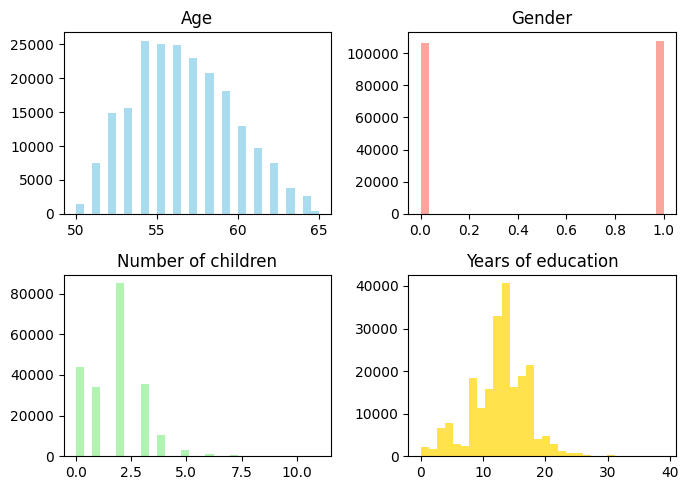

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["age"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Age")

axs[0, 1].hist(df["gender"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Gender")

axs[1, 0].hist(df["nb_children"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Number of children")

axs[1, 1].hist(df["yrseducation"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Years of education")

plt.tight_layout()

plt.show()

In [12]:
round(df["job_status"].value_counts(normalize=True), 2)

job_status
Private sector employee    0.39
Public sector employee     0.21
Employee                   0.21
Self-employed              0.15
Civil servant              0.04
Name: proportion, dtype: float64

In [13]:
round(
    df[
        ["yrscontribution", "retirement_age", "work_horizon", "work_horizon_change"]
    ].describe(),
    2,
)

,yrscontribution,retirement_age,work_horizon,work_horizon_change
count,213865.00,213865.00,213865.00,213865.00
mean,36.02,63.12,6.71,0.25
std,6.02,2.13,3.40,0.60
min,6.00,57.00,0.08,0.00
25%,33.00,61.67,4.00,0.00
50%,37.00,63.50,7.00,0.00
75%,40.00,65.00,9.00,0.08
max,55.00,68.00,17.00,4.00


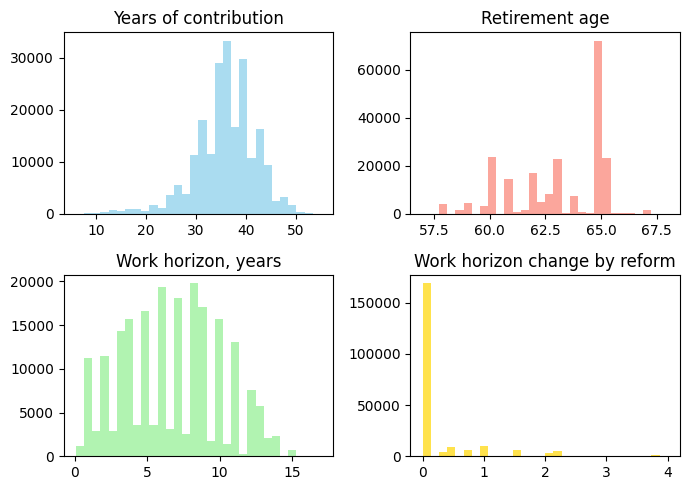

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["yrscontribution"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Years of contribution")

axs[0, 1].hist(df["retirement_age"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Retirement age")

axs[1, 0].hist(df["work_horizon"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Work horizon, years")

axs[1, 1].hist(df["work_horizon_change"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Work horizon change by reform")

plt.tight_layout()

plt.show()

In [15]:
round(df["eurodcat"].value_counts(normalize=True), 2)

eurodcat
0    0.82
1    0.18
Name: proportion, dtype: float64

In [16]:
df["eurod"].value_counts()

eurod
0.0     57605
1.0     52605
2.0     38675
3.0     26040
4.0     17655
5.0     10070
6.0      5770
7.0      3130
8.0      1255
9.0       740
10.0      245
11.0       55
12.0       20
Name: count, dtype: int64

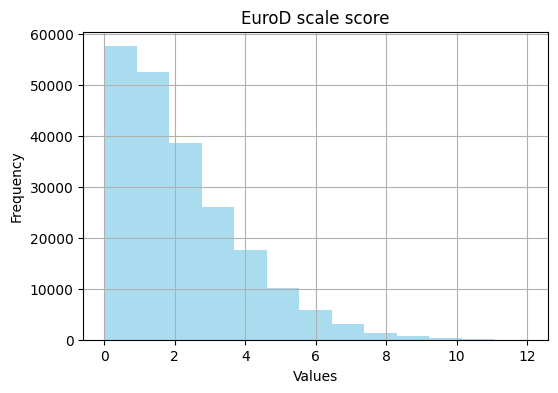

In [17]:
plt.figure(figsize=(6, 4))
plt.hist(df["eurod"], bins=13, color="skyblue", alpha=0.7)
plt.title("EuroD scale score")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [18]:
round(
    df[
        [
            "jqi_monthly_earnings",
            "jqi_skills_discretion",
            "jqi_social_environment",
            "jqi_physical_environment",
            "jqi_intensity",
            "jqi_prospects",
            "jqi_working_time_quality",
        ]
    ].describe(),
    2,
)

,jqi_monthly_earnings,jqi_skills_discretion,jqi_social_environment,jqi_physical_environment,jqi_intensity,jqi_prospects,jqi_working_time_quality
count,213865.00,213865.00,213865.00,213865.00,213865.00,213865.00,213865.00
mean,1597.38,59.79,80.84,84.12,51.04,60.04,86.79
std,495.20,13.64,4.73,9.03,7.21,9.14,9.23
min,318.22,5.41,40.91,42.82,20.16,12.50,36.44
25%,1272.92,49.22,78.51,78.15,46.64,54.17,82.60
50%,1534.49,59.84,81.05,87.08,50.55,60.86,88.95
75%,1834.53,70.84,83.40,91.37,55.19,66.07,93.35
max,6766.63,89.61,100.00,98.90,88.37,87.50,100.00


### Waves 4,5,6 common individuals

In [19]:
df.mergeid.nunique()

6743

In [20]:
unique_mergeid_w4 = set(df[df.wave == 4]["mergeid"].unique())
unique_mergeid_w5 = set(df[df.wave == 5]["mergeid"].unique())
unique_mergeid_w6 = set(df[df.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w5).intersection(
    unique_mergeid_w6
)
len(intersection_ids)

1730

In [21]:
w456_common = df[df["mergeid"].isin(intersection_ids)].reset_index(drop=True)

isco = w456_common["isco"].value_counts().to_frame().reset_index()
isco = isco[isco["count"] >= 10]
w456_common = w456_common[w456_common["isco"].isin(isco["isco"].unique())].reset_index(
    drop=True
)

In [22]:
w456_common.groupby("country").mergeid.nunique()

country
Austria           131
Belgium           237
Czech Republic    130
Denmark           154
Estonia           285
France            163
Germany            27
Italy             112
Slovenia           80
Spain             109
Switzerland       302
Name: mergeid, dtype: int64

In [23]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [24]:
w456_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w456_year_common.csv",
    index=False,
)

### Waves 4 and 6

In [25]:
result = (
    df[df["year"].isin([2013, 2015])]
    .groupby("mergeid")["work_horizon_change"]
    .sum()
    .reset_index()
)
result["year"] = 2015

df = df.drop(columns="work_horizon_change")
df = df.merge(result, on=["mergeid", "year"], how="left")

df["work_horizon_change"] = df["work_horizon_change"].fillna(0)

In [26]:
w46 = df[(df.wave == 4) | (df.wave == 6)].reset_index(drop=True)

In [27]:
w46.mergeid.nunique()

5976

In [28]:
w46.groupby("country").mergeid.nunique()

country
Austria           373
Belgium           741
Czech Republic    462
Denmark           469
Estonia           761
France            432
Germany           661
Italy             552
Slovenia          352
Spain             616
Switzerland       557
Name: mergeid, dtype: int64

In [29]:
w46.groupby("wave").mergeid.nunique()

wave
4    3610
6    4361
Name: mergeid, dtype: int64

In [30]:
w46.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w46_year.csv",
    index=False,
)

### Waves 4 and 6 common individuals

In [31]:
unique_mergeid_w4 = set(w46[w46.wave == 4]["mergeid"].unique())
unique_mergeid_w6 = set(w46[w46.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w6)
len(intersection_ids)

1995

In [32]:
w46_common = w46[w46["mergeid"].isin(intersection_ids)].reset_index(drop=True)

In [33]:
w46_common.groupby("country").mergeid.nunique()

country
Austria           153
Belgium           281
Czech Republic    159
Denmark           165
Estonia           325
France            185
Germany            30
Italy             138
Slovenia           97
Spain             127
Switzerland       335
Name: mergeid, dtype: int64

In [34]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [35]:
w46_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w46_year_common.csv",
    index=False,
)